In [1]:
import numpy as np


In [2]:
X = np.array ([
    [1400, 2, 3], 
    [1600, 3, 4], 
    [1700, 4, 5], 
    [1875, 5, 8], 
    [1100, 5, 3], 
    [1550, 4, 4], 
    [2350, 5, 3], 
    [2450, 4, 8], 
    [1425, 5, 8], 
    [1700, 7, 4]
])

In [3]:
y = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])


In [4]:
w1 = 0.1
w2 = 0.1 
w3 = 0.1 
b = 0.1 

In [5]:
def hypothesis (x):
    return w1 * x [0] + w2 * x[1] + w3 * x[2] + b

In [6]:
def cost_fucntion(X , y):
    m = len (y)
    prediction = np.array([hypothesis(x)for x in X])
    return (1/(2*m))* np.sum (((prediction - y) ** 2))

In [7]:
def GD (X, y, w1, w2, w3, b, lr, epoch):
    m = len (y)
    for i in range (epoch):
        prediction = np.array ([hypothesis(x) for x in X])
        dw1 = (1 / m ) * np.sum ((prediction - y) * X[:, 0])
        dw2 = (1 / m ) * np.sum ((prediction - y) * X[:, 1])
        dw3 = (1 / m ) * np.sum ((prediction - y) * X[:, 2])
        db = (1/ m) * np.sum ((prediction - y))
        w1 -= lr * dw1
        w2 -= lr * dw2
        w3 -= lr * dw3
        b -= lr * db
    return w1, w2, w3, b

In [8]:
lr = 0.00001
epoch = 1000
w1, w2, w3, b = GD (X, y, w1, w2, w3, b, lr, epoch)

In [9]:
new_house_size = 3000
new_house_bed = 5
new_house_living= 7 
new_house_price = hypothesis ([new_house_size, new_house_bed, new_house_living])
print (f"the house with the size of {new_house_size} , and {new_house_bed} bedrooms , and {new_house_living} living rroms is coming with the $: {new_house_price:.2f}")

the house with the size of 3000 , and 5 bedrooms , and 7 living rroms is coming with the $: 15248744572.00


# Evalauaiton of the model

In [10]:
y_actual = y
y_predicted = np.array([hypothesis(x) for x in X])

In [11]:
y_actual

array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000,
       319000, 255000])

In [12]:
y_predicted

array([7.11607420e+09, 8.13267324e+09, 8.64098643e+09, 9.53054338e+09,
       5.59125457e+09, 7.87854296e+09, 1.19448278e+10, 1.24531744e+10,
       7.24325703e+09, 8.64100968e+09])

In [13]:
def MAE (y_actual , y_predicted):
    return np.mean(np.absolute(y_actual - y_predicted))
print(f"The mean abslout erro for the model is : {MAE(y_actual, y_predicted)}")

The mean abslout erro for the model is : 8716947864.134075


In [14]:
def RMSE (y_actual, y_predicted):
    return np.sqrt(np.mean((y_actual - y_predicted) **2))
print (f"the root mean square error is : {RMSE(y_actual, y_predicted)}")

the root mean square error is : 8946792372.115381


In [15]:
def r_sqrt (y_actual, y_predicted):
    y_mean = np.mean(y_actual)
    ssr = np.sum(((y_actual - y_predicted) **2))
    sst = np.sum (((y_actual - y_mean) **2))
    r2 = 1 - (ssr / sst )
    return r2

In [16]:
print (f"the r-suared of the model is : {r_sqrt(y_actual, y_predicted)}")

the r-suared of the model is : -24553333153.320324


# plotting the matrix of the model

## 1: scatter plot

In [17]:
import matplotlib.pyplot as plt

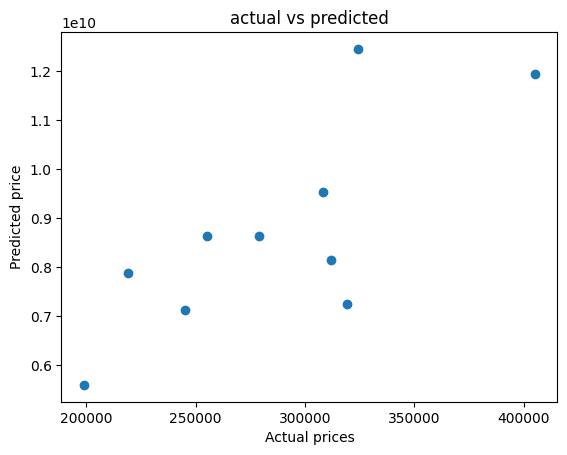

In [19]:
plt.scatter(y_actual, y_predicted)
plt.xlabel("Actual prices")
plt.ylabel("Predicted price")
plt.title ("actual vs predicted")
plt.show()

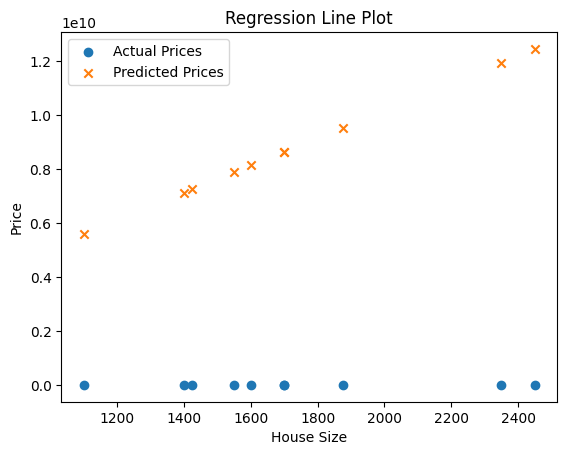

In [20]:
plt.scatter(X[:, 0], y_actual, label="Actual Prices", marker='o')
plt.scatter(X[:, 0], y_predicted, label="Predicted Prices", marker='x')
plt.xlabel("House Size")
plt.ylabel("Price")
plt.legend()
plt.title("Regression Line Plot")
plt.show()


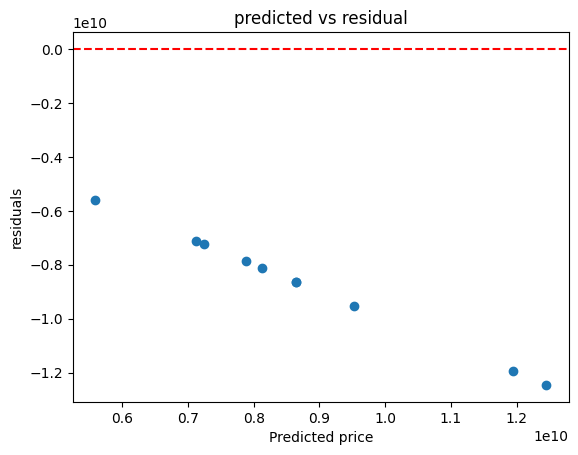

In [21]:
residual = y_actual - y_predicted
plt.scatter (y_predicted, residual)
plt.axhline (y = 0 , color = 'r', linestyle = '--')
plt.xlabel ("Predicted price")
plt.ylabel ("residuals")
plt.title ("predicted vs residual")
plt.show()

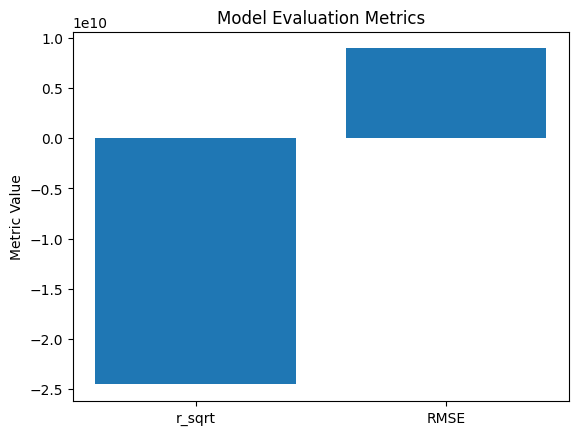

In [22]:
metrics = ['r_sqrt', 'RMSE']
value = [r_sqrt (y_actual, y_predicted), RMSE(y_actual, y_predicted)]
plt.bar(metrics, value)
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics')
plt.show()